# Performing analyses

Being able to define and build eye models is nice, but being able to analyze them is at least as important.
Visisipy provides a suite of analyses than can be performed on eye models in the {py:mod}`visisipy.analysis` module.

Analyses are functions with the following signature:

```python
analysis(model: EyeModel, [parameters], return_raw_result: bool, backend: type[BaseBackend]) -> AnalysisResult
```

- `model` is the eye model to be analyzed. This parameter is optional. If not provided, the eye model that is currently built in the backend is used.
- `parameters` are the parameters to be passed to the analysis. These parameters are specific to each analysis.
- `return_raw_result` is a boolean that indicates whether to return the raw result from the backend. This parameter is optional and defaults to `False`.
- `backend` is the backend to be used for the analysis. This parameter is optional and defaults to the currently selected backend. If no backend has been initialized, the default backend is initialized first.

The example below shows how to calculate the refraction of the eye model using the `refraction` analysis.

In [1]:
import matplotlib.pyplot as plt

import visisipy

# Perform all calculations in Optiland
visisipy.set_backend("optiland")

# Use the Navarro model
model = visisipy.EyeModel()

# Build the model in the backend
model.build()

# Perform the refraction analysis
refraction = visisipy.analysis.refraction()

print(refraction)

FourierPowerVectorRefraction(M=np.float64(-0.02179465768797834), J0=np.float64(-3.6343165496002543e-09), J45=np.float64(7.798322904498727e-13))


Alternatively, the model can be defined without building it, and passed to the analysis to build it:

In [2]:
myopic_model = visisipy.EyeModel(visisipy.create_geometry(axial_length=26.5))

refraction_myopic = visisipy.analysis.refraction(myopic_model)

print(refraction_myopic)

FourierPowerVectorRefraction(M=np.float64(-7.495269457585803), J0=np.float64(-3.6607862867854694e-09), J45=np.float64(1.3723242950814183e-12))


## Analyses available in Visisipy

### {py:func}`Cardinal points <visisipy.analysis.cardinal_points.cardinal_points>`

Calculates the cardinal points of the eye.

In [3]:
# Revert to the emmetropic model
model.build()

visisipy.analysis.cardinal_points()

CardinalPointsResult(focal_lengths=CardinalPoints(object=np.float64(-16.46395572885349), image=np.float64(22.021982081505797)), focal_points=CardinalPoints(object=np.float64(-7.250149109263879), image=np.float64(-0.006670375453102611)), principal_points=CardinalPoints(object=np.float64(9.213806619589612), image=np.float64(-22.0286524569589)), anti_principal_points=CardinalPoints(object=np.float64(-23.714104838117372), image=np.float64(22.015311706052696)), nodal_points=CardinalPoints(object=np.float64(14.771832972241917), image=np.float64(-16.470626104306593)), anti_nodal_points=CardinalPoints(object=np.float64(-29.272131190769677), image=np.float64(16.45728535340039)))

### {py:func}`FFT Point Spread Function <visisipy.analysis.psf.fft_psf>`

Calculates the point spread function (PSF) of the eye using the Fast Fourier Transform (FFT).
Compared to the Huygens PSF, the FFT PSF is faster to compute, but may be inaccurate for certain eye models.

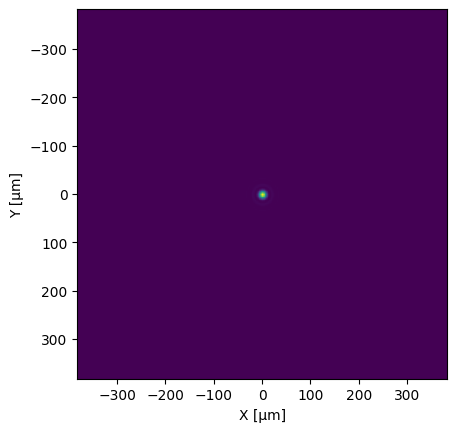

In [4]:
fft_psf = visisipy.analysis.fft_psf(field_coordinate=(0, 0))

plt.imshow(
    fft_psf, extent=(fft_psf.columns[0], fft_psf.columns[-1], fft_psf.index[-1], fft_psf.index[0]), origin="lower"
)
plt.xlabel("X [μm]")
plt.ylabel("Y [μm]");

### {py:func}`Huygens Point Spread Function <visisipy.analysis.psf.huygens_psf>`

Calculates the Huygens point spread function (PSF) of the eye. This PSF is more accurate than the FFT PSF, but may be slower to compute.

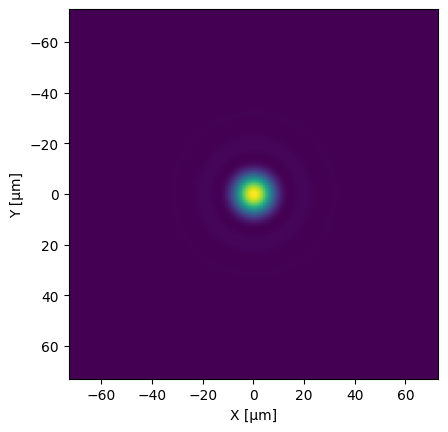

In [5]:
huygens_psf = visisipy.analysis.huygens_psf(field_coordinate=(0, 0))

plt.imshow(
    huygens_psf,
    extent=(huygens_psf.columns[0], huygens_psf.columns[-1], huygens_psf.index[-1], huygens_psf.index[0]),
    origin="lower",
)

plt.xlabel("X [μm]")
plt.ylabel("Y [μm]");

### {py:func}`Raytrace <visisipy.analysis.raytracing.raytrace>`

Performs one or more single ray traces through the eye model.

In [6]:
raytrace = visisipy.analysis.raytrace(coordinates=[(0, 0), (0, 30), (0, 60)], wavelengths=[0.543, 0.6328], pupil=(0, 0))

raytrace

,index,field,wavelength,surface,comment,x,y,z
0,0,"(0, 0)",0.5430,0,None,0.0,0.000000,-1.000000e+00
1,1,"(0, 0)",0.5430,1,None,0.0,0.000000,-8.881784e-16
2,2,"(0, 0)",0.5430,2,None,0.0,0.000000,5.500000e-01
3,3,"(0, 0)",0.5430,3,None,0.0,0.000000,3.600000e+00
4,4,"(0, 0)",0.5430,4,None,0.0,0.000000,3.600000e+00
5,5,"(0, 0)",0.5430,5,None,0.0,0.000000,7.600000e+00
6,6,"(0, 0)",0.5430,6,None,0.0,0.000000,2.392030e+01
7,0,"(0, 30)",0.5430,0,None,0.0,-2.332464,-1.000000e+00
8,1,"(0, 30)",0.5430,1,None,0.0,-1.652164,1.783145e-01
9,2,"(0, 30)",0.5430,2,None,0.0,-1.406544,7.040066e-01


### {py:func}`Refraction <visisipy.analysis.refraction.refraction>`

Calculates the spherical equivalent of refraction of the eye model.
The refraction is calculated from Zernike standard coefficients and represented in Fourier power vector form.

In [7]:
# Calculate the refraction at an eccentricity of 30°
refraction = visisipy.analysis.refraction(field_coordinate=(0, 30), use_higher_order_aberrations=True)

print(refraction)

FourierPowerVectorRefraction(M=np.float64(0.7928073037433416), J0=np.float64(1.0982689225470976), J45=np.float64(3.2368802612563178e-12))


You can convert the refraction from Fourier power vector form to other representations:

In [8]:
print(refraction.to_sphero_cylindrical())
print(refraction.to_polar_power_vectors())

SpheroCylindricalRefraction(sphere=np.float64(1.8910762262904393), cylinder=np.float64(-2.1965378450941953), axis=np.float64(8.443268035349381e-11))
PolarPowerVectorRefraction(M=np.float64(0.7928073037433416), J=np.float64(1.0982689225470976), axis=np.float64(8.443268035349381e-11))


### {py:func}`Strehl Ratio <visisipy.analysis.psf.strehl_ratio>`

The Strehl ratio is a measure of the quality of the optical system. For a perfectly unabberated optical system, the Strehl ratio is 1.0. The Strehl ratio is calculated from the point spread function (PSF) of the eye model.

In [9]:
visisipy.analysis.strehl_ratio(field_coordinate=(0, 0))

np.float64(0.9881768158337558)

### {py:func}`Zernike coefficients <visisipy.analysis.zernike_standard_coefficients.zernike_standard_coefficients>`

Calculates the Zernike standard coefficients of the eye model at the retina surface.

In [10]:
zernike_coefficients = visisipy.analysis.zernike_standard_coefficients(sampling=128, maximum_term=15)

for term, coefficient in zernike_coefficients.items():
    print(f"Z{term:>2}: {coefficient:.4f}")

Z 1: 0.0034
Z 2: -0.0000
Z 3: 0.0000
Z 4: 0.0023
Z 5: 0.0000
Z 6: -0.0000
Z 7: -0.0000
Z 8: 0.0000
Z 9: 0.0000
Z10: -0.0000
Z11: 0.0003
Z12: -0.0000
Z13: -0.0000
Z14: 0.0000
Z15: 0.0000


## Accuracy of analyses for both backends

The accuracy of the analyses depends on the [backend](backend.ipynb) used.
The table below summarizes to what extent the OpticStudio and Optiland backends provide similar results. 
As Optiland is a relatively new software package, we advise caution when its results differ from OpticStudio, the current gold standard for optical simulations.
See also [](../examples/Backend%20comparison/backend_comparison.ipynb) for an in-depth comparison of the two backends.

| Analysis | OpticStudio | Optiland |
|----------|-------------|----------|
| Cardinal points | ✅ | ✅ |
| FFT PSF | ✅ | ⚠️ |
| Huygens PSF | ✅ | ⚠️ |
| Raytrace | ✅ | ✅ |
| Refraction | ✅ | ✅ |
| RMS HOA | ✅ | ✅ |
| Strehl ratio | ✅ | ⚠️ |
| Zernike coefficients | ✅ | ✅ |

:::{dropdown} Optiland FFT PSF and Strehl ratio
:color: warning

The Optiland FFT PSF analysis has been validated against the OpticStudio FFT PSF analysis, and the results are very similar for on-axis fields.
However, there are some [notable differences with OpticStudio](https://github.com/HarrisonKramer/optiland/discussions/157).
These differences are currently being investigated and will be addressed in future releases of Optiland:

- The PSF extent calculation ignores the image-space refractive index, resulting in incorrect PSF extents. This does not affect the PSF values.
- PSF calculation of off-axis fields may result in incorrect values.

This also affects the Strehl ratio calculation, which is based on the PSF.
:::

:::{dropdown} Optiland Huygens PSF
:color: warning

OpticStudio and Optiland use different sampling strategies and image sizes for the Huygens PSF calculation.
This makes comparing results between the two backends difficult.
For central fields, the results are very similar, but for off-axis fields, the results may differ significantly.
Furthermore, due to the different sampling strategies, the Optiland Huygens Strehl ratio tends to be lower than the OpticStudio Huygens Strehl ratio.
:::

## Visualizing eye models

Visisipy comes with basic model visualization tools in {py:mod}`visisipy.plots`:

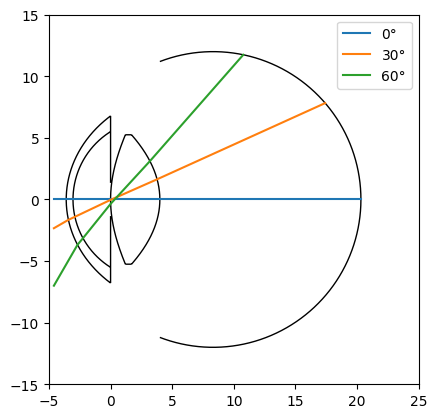

In [11]:
fig, ax = plt.subplots()

# Plot the raytrace results
for f, r in raytrace.query("wavelength == 0.543").groupby("field"):
    ax.plot(r.z - (model.geometry.cornea_thickness + model.geometry.anterior_chamber_depth), r.y, label=f"{f[1]}°")

visisipy.plots.plot_eye(geometry=model.geometry, ax=ax, lens_edge_thickness=0.5)

ax.set_xlim(-5, 25)
ax.set_ylim(-15, 15)
ax.set_aspect("equal")
ax.legend()